In [1]:
try:
    from IPython import get_ipython
    get_ipython().magic('reset -f')  
except:
    pass
from IPython import get_ipython
ipython = get_ipython().magic
import io
import os
import sys
os.chdir('/Users/markprosser/Desktop/PythonScripts')
import MCP_functions as MCP
import numpy as np
import matplotlib.pyplot as plt
import pickle
plt.close("all")

import pandas as pd
import savReaderWriter as spss
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
import pylab

/Users/markprosser/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
savFileName = '/Users/markprosser/Desktop/PythonScripts/Input_needed_by/Stats_msc_year2/Stats_8.sav'
with spss.SavReader(savFileName) as reader:
    records = reader.all()
df1 = pd.DataFrame(records)

In [3]:
df1.head()

,0,1,2,3,4,5,6,7
0,1.0,50.0,1.0,1.0,1.0,3.0,4.0,1.0
1,2.0,0.0,4.0,3.0,1.0,2.0,3.0,1.0
2,1.0,100.0,3.0,3.0,1.0,3.0,4.0,2.0
3,1.0,500.0,3.0,3.0,2.0,3.0,4.0,2.0
4,1.0,25.0,-999.0,3.0,2.0,3.0,3.0,1.0


In [4]:
df1.columns = ['paytax', 'amount', 'income', 'age', 'boat', 'relax', 'visit', 'env']
df1.head()

,paytax,amount,income,age,boat,relax,visit,env
0,1.0,50.0,1.0,1.0,1.0,3.0,4.0,1.0
1,2.0,0.0,4.0,3.0,1.0,2.0,3.0,1.0
2,1.0,100.0,3.0,3.0,1.0,3.0,4.0,2.0
3,1.0,500.0,3.0,3.0,2.0,3.0,4.0,2.0
4,1.0,25.0,-999.0,3.0,2.0,3.0,3.0,1.0


In [5]:
df2 = pd.DataFrame.copy(df1)
df2.paytax.replace([1, 2], ['yes', 'no'],  inplace=True)
df2.income.replace([1, 2, 3, 4], ['0k-10k', '10k-20k', '20k-30k', '30k-40k'],  inplace=True)
df2.age.replace([1, 2, 3, 4], ['16-24', '25-44', '45-64', '65+'],  inplace=True)
df2.boat.replace([1, 2], ['no', 'yes'],  inplace=True)
df2.relax.replace([1, 2, 3], ['never', 'sometimes', 'often'],  inplace=True)
df2.visit.replace([1, 2, 3, 4], ['daytripper', 'onholiday', 'resident', 'worker'],  inplace=True)
df2.env.replace([1, 2], ['nonmember', 'member'],  inplace=True)
df2.head()

,paytax,amount,income,age,boat,relax,visit,env
0,yes,50.0,0k-10k,16-24,no,often,worker,nonmember
1,no,0.0,30k-40k,45-64,no,sometimes,resident,nonmember
2,yes,100.0,20k-30k,45-64,no,often,worker,member
3,yes,500.0,20k-30k,45-64,yes,often,worker,member
4,yes,25.0,-999,45-64,yes,often,resident,nonmember


In [6]:
df1 = df1.replace(-999.0, np.nan)
df1[28:33]

,paytax,amount,income,age,boat,relax,visit,env
28,1.0,75.0,NaN,2.0,1.0,3.0,3.0,2.0
29,2.0,0.0,1.0,2.0,2.0,3.0,3.0,1.0
30,1.0,0.0,2.0,4.0,2.0,3.0,3.0,1.0
31,2.0,0.0,4.0,2.0,1.0,3.0,3.0,1.0
32,1.0,25.0,3.0,2.0,2.0,3.0,3.0,1.0


In [7]:
df2 = df2.replace(-999.0, np.nan)
df2[28:33]

,paytax,amount,income,age,boat,relax,visit,env
28,yes,75.0,NaN,25-44,no,often,resident,member
29,no,0.0,0k-10k,25-44,yes,often,resident,nonmember
30,yes,0.0,10k-20k,65+,yes,often,resident,nonmember
31,no,0.0,30k-40k,25-44,no,often,resident,nonmember
32,yes,25.0,20k-30k,25-44,yes,often,resident,nonmember


In [8]:
#8_1

In [66]:
#len(df2[df2['paytax']!=np.isnumeric()])

In [10]:
len(df2[df2['paytax']=='yes']) / len(df2) * 100

85.26682134570765

In [11]:
#8_2

In [12]:
ct1 = pd.crosstab(df2.paytax, df2.income, rownames=['paytax'], colnames=['income'], margins=True, dropna=True)
ct1

income,0k-10k,10k-20k,20k-30k,30k-40k,All
paytax,,,,,
no,21,38,28,24,111
yes,121,230,190,157,698
All,142,268,218,181,809


In [13]:
ct2 = pd.crosstab(df2.paytax, df2.income, rownames=['paytax'], colnames=['income'], \
                  margins=True, dropna=True, normalize='columns')
ct2

income,0k-10k,10k-20k,20k-30k,30k-40k,All
paytax,,,,,
no,0.147887,0.141791,0.12844,0.132597,0.137206
yes,0.852113,0.858209,0.87156,0.867403,0.862794


In [14]:
#8_3

In [15]:
arr1 = np.array(ct1)
arr1_row1 = arr1[0][0:4]
arr1_row2 = arr1[1][0:4]
arr1 = np.vstack((arr1_row1, arr1_row2)) 
arr1

array([[ 21,  38,  28,  24],
       [121, 230, 190, 157]])

In [16]:
chi2, p, dof, expected = stats.chi2_contingency(observed=arr1, correction=True, lambda_=None)
print('Pearson Chi-Square')
print(chi2)
print('p')
print(p)
print('dof')
print(dof)
print('expected')
print(expected)

Pearson Chi-Square
0.358425855723
p
0.948690264543
dof
3
expected
[[  19.48331273   36.77132262   29.91100124   24.83436341]
 [ 122.51668727  231.22867738  188.08899876  156.16563659]]


In [17]:
#8_4

In [18]:
ct3 = pd.crosstab(df2.paytax, df2.visit, rownames=['paytax'], colnames=['visit'], margins=True, dropna=True)
ct3

visit,daytripper,onholiday,resident,worker,All
paytax,,,,,
no,34,66,19,0,119
yes,149,447,132,5,733
All,183,513,151,5,852


In [19]:
ct4 = pd.crosstab(df2.paytax, df2.visit, rownames=['paytax'], colnames=['visit'], \
                  margins=True, dropna=True, normalize='columns')
ct4

visit,daytripper,onholiday,resident,worker,All
paytax,,,,,
no,0.185792,0.128655,0.125828,0.0,0.139671
yes,0.814208,0.871345,0.874172,1.0,0.860329


In [20]:
arr3 = np.array(ct3)
arr3_row1 = arr3[0][0:4]
arr3_row2 = arr3[1][0:4]
arr3 = np.vstack((arr3_row1, arr3_row2)) 
arr3

array([[ 34,  66,  19,   0],
       [149, 447, 132,   5]])

In [21]:
chi2, p, dof, expected = stats.chi2_contingency(observed=arr3, correction=True, lambda_=None)
print('Pearson Chi-Square')
print(chi2)
print('p')
print(p)
print('dof')
print(dof)
print('expected')
print(expected)

Pearson Chi-Square
4.81015877787
p
0.18623786685
dof
3
expected
[[  25.55985915   71.65140845   21.09037559    0.69835681]
 [ 157.44014085  441.34859155  129.90962441    4.30164319]]


In [22]:
#8_5

In [23]:
df3 = pd.DataFrame.copy(df1)
df3.visit[df3.visit == 3] = 3
df3.visit[df3.visit == 4] = 3
df3.head()

,paytax,amount,income,age,boat,relax,visit,env
0,1.0,50.0,1.0,1.0,1.0,3.0,3.0,1.0
1,2.0,0.0,4.0,3.0,1.0,2.0,3.0,1.0
2,1.0,100.0,3.0,3.0,1.0,3.0,3.0,2.0
3,1.0,500.0,3.0,3.0,2.0,3.0,3.0,2.0
4,1.0,25.0,NaN,3.0,2.0,3.0,3.0,1.0


In [24]:
df4 = pd.DataFrame.copy(df2)
df4.visit[df4.visit == 'resident'] = 'res/work'
df4.visit[df4.visit == 'worker'] = 'res/work'
df4.tail()

/Users/markprosser/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/markprosser/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,paytax,amount,income,age,boat,relax,visit,env
857,yes,10.0,10k-20k,25-44,NaN,NaN,daytripper,nonmember
858,no,0.0,0k-10k,16-24,no,sometimes,daytripper,nonmember
859,yes,52.0,NaN,65+,no,sometimes,daytripper,nonmember
860,yes,260.0,0k-10k,25-44,yes,often,NaN,member
861,yes,2.0,10k-20k,25-44,no,sometimes,NaN,member


In [25]:
ct5 = pd.crosstab(df4.paytax, df4.visit, rownames=['paytax'], colnames=['visit'], margins=True, dropna=True)
ct5

visit,daytripper,onholiday,res/work,All
paytax,,,,
no,34,66,19,119
yes,149,447,137,733
All,183,513,156,852


In [26]:
ct6 = pd.crosstab(df4.paytax, df4.visit, rownames=['paytax'], colnames=['visit'], \
                  margins=True, dropna=True, normalize='columns')
ct6

visit,daytripper,onholiday,res/work,All
paytax,,,,
no,0.185792,0.128655,0.121795,0.139671
yes,0.814208,0.871345,0.878205,0.860329


In [27]:
arr5 = np.array(ct5)
arr5_row1 = arr3[0][0:3]
arr5_row2 = arr3[1][0:3]
arr5 = np.vstack((arr5_row1, arr5_row2)) 
arr5

array([[ 34,  66,  19],
       [149, 447, 132]])

In [28]:
chi2, p, dof, expected = stats.chi2_contingency(observed=arr5, correction=True, lambda_=None)
print('Pearson Chi-Square')
print(chi2)
print('p')
print(p)
print('dof')
print(dof)
print('expected')
print(expected)

Pearson Chi-Square
3.97400607719
p
0.137105710858
dof
2
expected
[[  25.7107438    72.07438017   21.21487603]
 [ 157.2892562   440.92561983  129.78512397]]


In [29]:
#8_7

In [30]:
ct7 = pd.crosstab(df2.paytax, df2.env, rownames=['paytax'], colnames=['env'], margins=True, dropna=True)
ct7

env,member,nonmember,All
paytax,,,
no,35,84,119
yes,330,405,735
All,365,489,854


In [31]:
ct8 = pd.crosstab(df2.paytax, df2.env, rownames=['paytax'], colnames=['env'], \
                  margins=True, dropna=True, normalize='columns')
ct8

env,member,nonmember,All
paytax,,,
no,0.09589,0.171779,0.139344
yes,0.90411,0.828221,0.860656


In [32]:
arr7 = np.array(ct7)
arr7_row1 = arr7[0][0:2]
arr7_row2 = arr7[1][0:2]
arr7 = np.vstack((arr7_row1, arr7_row2)) 
arr7

array([[ 35,  84],
       [330, 405]])

In [33]:
chi2, p, dof, expected = stats.chi2_contingency(observed=arr7, correction=True, lambda_=None)
print('Pearson Chi-Square')
print(chi2)
print('p')
print(p)
print('dof')
print(dof)
print('expected')
print(expected)

Pearson Chi-Square
9.41362946411
p
0.00215378483946
dof
1
expected
[[  50.86065574   68.13934426]
 [ 314.13934426  420.86065574]]


In [34]:
#8_8

In [35]:
ct9 = pd.crosstab(df2.paytax, df2.relax, rownames=['paytax'], colnames=['relax'], margins=True, dropna=True)
ct9

relax,never,often,sometimes,All
paytax,,,,
no,24,58,35,117
yes,74,474,181,729
All,98,532,216,846


In [36]:
ct10 = pd.crosstab(df2.paytax, df2.relax, rownames=['paytax'], colnames=['relax'], \
                  margins=True, dropna=True, normalize='columns')
ct10

relax,never,often,sometimes,All
paytax,,,,
no,0.244898,0.109023,0.162037,0.138298
yes,0.755102,0.890977,0.837963,0.861702


In [37]:
arr9 = np.array(ct9)
arr9_row1 = arr9[0][0:3]
arr9_row2 = arr9[1][0:3]
arr9 = np.vstack((arr9_row1, arr9_row2)) 
arr9

array([[ 24,  58,  35],
       [ 74, 474, 181]])

In [38]:
chi2, p, dof, expected = stats.chi2_contingency(observed=arr9, correction=True, lambda_=None)
print('Pearson Chi-Square')
print(chi2)
print('p')
print(p)
print('dof')
print(dof)
print('expected')
print(expected)

Pearson Chi-Square
14.1921811682
p
0.000828336915062
dof
2
expected
[[  13.55319149   73.57446809   29.87234043]
 [  84.44680851  458.42553191  186.12765957]]


In [39]:
#8_9

In [40]:
print('Mean of AMOUNT is:')
print(df2['amount'].mean())
print('')
print('Median of AMOUNT is:')
print(df2['amount'].median())
print('')
print('Mode of AMOUNT is:')
print(df2['amount'].mode())
print('')
print('Max of AMOUNT is:')
print(df2['amount'].max())
print('')
print('Min of AMOUNT is:')
print(df2['amount'].min())
print('')
print('Range of AMOUNT is:')
print(df2['amount'].max()-df2['amount'].min())
print('')
print('Quantile of AMOUNT is:')
print(df1['amount'].quantile([0.25, 0.5, 0.75]))

Mean of AMOUNT is:
67.19434988179668

Median of AMOUNT is:
30.0

Mode of AMOUNT is:
0    50.0
dtype: float64

Max of AMOUNT is:
1250.0

Min of AMOUNT is:
0.0

Range of AMOUNT is:
1250.0

Quantile of AMOUNT is:
0.25      5.0
0.50     30.0
0.75    100.0
Name: amount, dtype: float64


In [41]:
#8_10

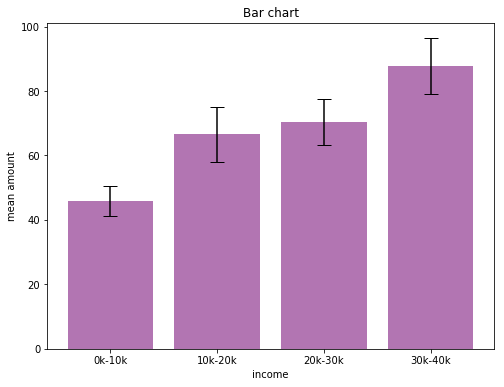

In [42]:
plt.figure(1, figsize=(8, 6));

# Make a fake dataset:
height = df2.groupby('income')['amount'].mean().tolist()
bars = df2.groupby('income')['amount'].mean().index.tolist()
y_pos = np.arange(len(bars))
 
stdev = df2.groupby('income')['amount'].std().tolist()
error_bars = (stdev / (df2.amount.count()**0.5)) * 1.96
    
# Create bars
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6), yerr=error_bars, capsize=7)

plt.title('Bar chart')
plt.xlabel('income')
plt.ylabel('mean amount')
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

In [43]:
#8_11

In [67]:
x1 = df2[df2['income']=='0k-10k']['amount'].dropna()
x2 = df2[df2['income']=='10k-20k']['amount'].dropna()
x3 = df2[df2['income']=='20k-30k']['amount'].dropna()
x4 = df2[df2['income']=='30k-40k']['amount'].dropna()
stats.f_oneway(x1, x2, x3, x4)

F_onewayResult(statistic=3.5980022832099543, pvalue=0.013286193024309167)

In [45]:
#get rid of NaNs
df5 = pd.DataFrame.copy(df2)
df5 = df5.dropna(subset=['amount'])
df5 = df5.dropna(subset=['income'])
df5.head()

,paytax,amount,income,age,boat,relax,visit,env
0,yes,50.0,0k-10k,16-24,no,often,worker,nonmember
1,no,0.0,30k-40k,45-64,no,sometimes,resident,nonmember
2,yes,100.0,20k-30k,45-64,no,often,worker,member
3,yes,500.0,20k-30k,45-64,yes,often,worker,member
7,yes,10.0,30k-40k,25-44,yes,sometimes,resident,member


In [46]:
ans1 = pairwise_tukeyhsd(df5['amount'], df5['income'],  alpha=0.05)
print(ans1)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1  group2 meandiff  lower    upper  reject
------------------------------------------------
 0k-10k 10k-20k 20.6913  -9.8063  51.1889 False 
 0k-10k 20k-30k 24.5232  -7.1625   56.209 False 
 0k-10k 30k-40k 41.7947   8.8161  74.7733  True 
10k-20k 20k-30k  3.8319  -22.9664 30.6302 False 
10k-20k 30k-40k 21.1034  -7.2118  49.4186 False 
20k-30k 30k-40k 17.2715  -12.3197 46.8627 False 
------------------------------------------------


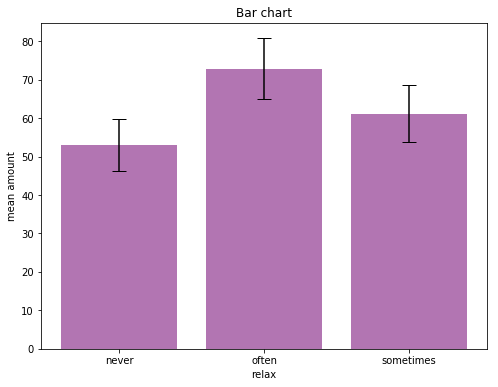

In [47]:
plt.figure(2, figsize=(8, 6));

# Make a fake dataset:
height = df2.groupby('relax')['amount'].mean().tolist()
bars = df2.groupby('relax')['amount'].mean().index.tolist()
y_pos = np.arange(len(bars))
 
stdev = df2.groupby('relax')['amount'].std().tolist()
error_bars = (stdev / (df2.amount.count()**0.5)) * 1.96
    
# Create bars
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6), yerr=error_bars, capsize=7)

plt.title('Bar chart')
plt.xlabel('relax')
plt.ylabel('mean amount')
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

In [48]:
y1 = df2[df2['relax']=='never']['amount'].dropna()
y2 = df2[df2['relax']=='often']['amount'].dropna()
y3 = df2[df2['relax']=='sometimes']['amount'].dropna()

stats.f_oneway(y1, y2, y3)

F_onewayResult(statistic=1.6837168957757411, pvalue=0.18631231448119093)

In [49]:
#get rid of NaNs
df5 = df5.dropna(subset=['relax'])
df5.tail()

,paytax,amount,income,age,boat,relax,visit,env
855,yes,60.0,10k-20k,65+,no,often,daytripper,nonmember
856,yes,50.0,20k-30k,45-64,yes,never,daytripper,nonmember
858,no,0.0,0k-10k,16-24,no,sometimes,daytripper,nonmember
860,yes,260.0,0k-10k,25-44,yes,often,NaN,member
861,yes,2.0,10k-20k,25-44,no,sometimes,NaN,member


In [50]:
ans2 = pairwise_tukeyhsd(df5['amount'], df5['relax'],  alpha=0.05)
print(ans2)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1   group2  meandiff  lower    upper  reject
-------------------------------------------------
never    often   19.7287  -10.995  50.4524 False 
never  sometimes  6.8991   -27.24  41.0383 False 
often  sometimes -12.8296 -35.3549  9.6957 False 
-------------------------------------------------


In [51]:
#8_14

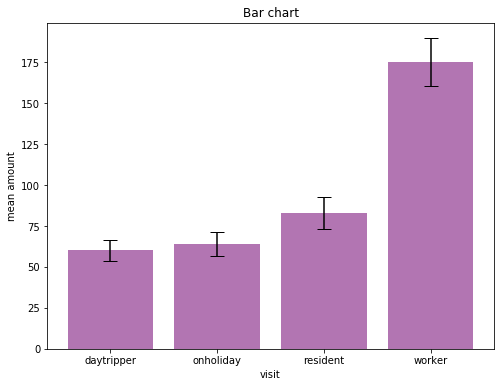

In [52]:
plt.figure(3, figsize=(8, 6));

# Make a fake dataset:
height = df2.groupby('visit')['amount'].mean().tolist()
bars = df2.groupby('visit')['amount'].mean().index.tolist()
y_pos = np.arange(len(bars))
 
stdev = df2.groupby('visit')['amount'].std().tolist()
error_bars = (stdev / (df2.amount.count()**0.5)) * 1.96
    
# Create bars
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6), yerr=error_bars, capsize=7)

plt.title('Bar chart')
plt.xlabel('visit')
plt.ylabel('mean amount')
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

In [53]:
z1 = df2[df2['visit']=='daytripper']['amount'].dropna()
z2 = df2[df2['visit']=='onholiday']['amount'].dropna()
z3 = df2[df2['visit']=='resident']['amount'].dropna()
z4 = df2[df2['visit']=='worker']['amount'].dropna()

stats.f_oneway(z1, z2, z3, z4)

F_onewayResult(statistic=2.5188913868233822, pvalue=0.056859635741036113)

In [54]:
#get rid of NaNs
df5 = df5.dropna(subset=['visit'])
df5.tail()

,paytax,amount,income,age,boat,relax,visit,env
852,yes,50.0,20k-30k,16-24,no,often,daytripper,member
854,yes,250.0,10k-20k,45-64,no,sometimes,daytripper,member
855,yes,60.0,10k-20k,65+,no,often,daytripper,nonmember
856,yes,50.0,20k-30k,45-64,yes,never,daytripper,nonmember
858,no,0.0,0k-10k,16-24,no,sometimes,daytripper,nonmember


In [55]:
ans3 = pairwise_tukeyhsd(df5['amount'], df5['visit'],  alpha=0.05)
print(ans3)

  Multiple Comparison of Means - Tukey HSD,FWER=0.05  
  group1     group2  meandiff  lower    upper   reject
------------------------------------------------------
daytripper onholiday  4.3956  -22.2126 31.0038  False 
daytripper  resident 24.1069  -9.7028  57.9166  False 
daytripper   worker  155.3648 -16.4745 327.2041 False 
onholiday   resident 19.7113  -8.3988  47.8215  False 
onholiday    worker  150.9692 -19.8401 321.7785 False 
 resident    worker  131.2579 -40.8204 303.3361 False 
------------------------------------------------------


In [56]:
#8_15

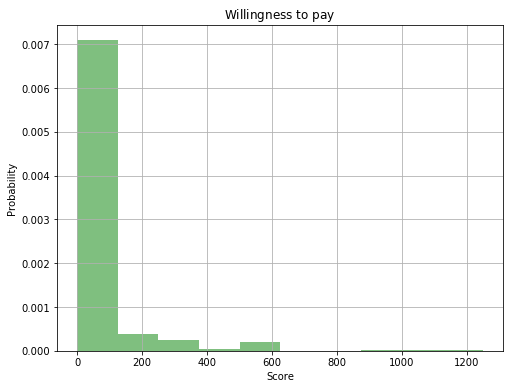

In [57]:
x = df2['amount'].dropna().tolist()
plt.figure(5, figsize=(8, 6));
n, bins, patches = plt.hist(x, 10, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Willingness\ to\ pay}$')
plt.grid(True)
plt.show()

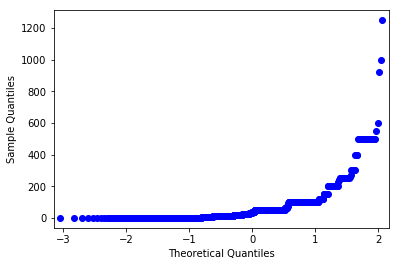

In [58]:
sm.qqplot(df2['amount'])#, line='r')
pylab.show()

In [59]:
#Kolmogorov-Smirnov
stats.kstest(df2['amount'].dropna(), 'norm', N=20, alternative='two-sided', mode='approx')

#(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')[source]

KstestResult(statistic=0.78602033821443162, pvalue=0.0)

In [60]:
stats.shapiro(df2['amount'].dropna(), a=None, reta=False)

(0.5670703053474426, 2.2535681903271708e-41)

In [61]:
x1 = df2[df2['income']=='0k-10k']['amount'].dropna()
x2 = df2[df2['income']=='10k-20k']['amount'].dropna()
x3 = df2[df2['income']=='20k-30k']['amount'].dropna()
x4 = df2[df2['income']=='30k-40k']['amount'].dropna()

stats.kruskal(x1, x2, x3, x4, nan_policy='propagate')

KruskalResult(statistic=14.732059428607492, pvalue=0.0020605469921174658)

In [62]:
#8_18
group1 = np.array((x1.tolist(), x2.tolist(), x3.tolist(), x4.tolist()))

In [63]:
#https://gist.github.com/alimuldal/fbb19b73fa25423f02e8
H, p_omnibus, Z_pairs, p_corrected, reject = MCP.kw_dunn(group1, to_compare=None, alpha=0.05, method='bonf')
print('H')
print(H)
print('')
print('p_omnibus')
print(p_omnibus)
print('')
print('Z_pairs')
print(Z_pairs)
print('')
print('p_corrected')
print(p_corrected)
print('')
print('reject')
print(reject)
print('')

H
14.7320594286

p_omnibus
0.00206054699212

Z_pairs
[ 1.20618826  2.01518352  3.58710462  1.0100171   2.87872988  1.83991387]

p_corrected
[ 1.          0.26331254  0.00200622  1.          0.02395681  0.3946853 ]

reject
[False False  True False  True False]

